# **FULL CODE PIPELINE**

# **Importing Libraries**

In [1]:
!pip install pandas numpy scikit-learn nltk tensorflow imbalanced-learn

In [2]:
import pandas as pd

import numpy as np

import re

import string

from imblearn.over_sampling import SMOTE

from sklearn.utils import resample

import nltk

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Embedding, Bidirectional, GRU, Dense, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.callbacks import EarlyStopping

import tensorflow as tf

# **Move specific subcategories if null**

### This section moves rows with certain 'category' values into the 'sub_category' column where 'sub_category' is null.

In [3]:
data = pd.read_csv(r"C:\Users\amit\Downloads\train.csv")



subcategories_to_move = [

    "RapeGang Rape RGRSexually Abusive Content",

    "Sexually Explicit Act",

    "Child Pornography CPChild Sexual Abuse Material CSAM",

    "Sexually Obscene material"

]



mask = data['category'].isin(subcategories_to_move) & data['sub_category'].isna()



# Step 2: Update the Subcategory column with the values from the Category column for these rows

data.loc[mask, 'sub_category'] = data.loc[mask, 'category']



# Step 3: Set the Category for these rows to "Women/Child Related Crime"

data.loc[mask, 'category'] = 'Women/Child Related Crime'



# Fill remaining nulls in Subcategory with 'Unknown' (if needed)

data['sub_category'].fillna('Unknown', inplace=True)



# Display the transformed dataset (for verification)

print(data[mask])


                        category                               sub_category  \
8      Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   
25     Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   
39     Women/Child Related Crime                      Sexually Explicit Act   
45     Women/Child Related Crime                  Sexually Obscene material   
49     Women/Child Related Crime                      Sexually Explicit Act   
...                          ...                                        ...   
93632  Women/Child Related Crime                      Sexually Explicit Act   
93648  Women/Child Related Crime                      Sexually Explicit Act   
93653  Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   
93667  Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   
93678  Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   

                                      crimeaditiona

C:\Users\amit\AppData\Local\Temp\ipykernel_23544\4047937933.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['sub_category'].fillna('Unknown', inplace=True)


In [4]:
cat_c=data["category"].value_counts()

print(cat_c)

cat_cc=data["sub_category"].value_counts()

print(cat_cc)

category
Online Financial Fraud                            57434
Online and Social Media Related Crime             12140
Any Other Cyber Crime                             10878
Women/Child Related Crime                          6591
Cyber Attack/ Dependent Crimes                     3608
Hacking  Damage to computercomputer system etc     1710
Cryptocurrency Crime                                480
Online Gambling  Betting                            444
Online Cyber Trafficking                            183
Cyber Terrorism                                     161
Ransomware                                           56
Report Unlawful Content                               1
Name: count, dtype: int64
sub_category
UPI Related Frauds                                                      26856
Other                                                                   10878
DebitCredit Card FraudSim Swap Fraud                                    10805
Internet Banking Related Fraud                

# **Renaming specific categories**

### This section renames certain categories to more concise or consistent terms for further analysis.

In [5]:
# Renaming specified categories

data['category'] = data['category'].replace(

    {

        'Hacking  Damage to computercomputer system etc': 'Other Cyber Crime',

        'Online Cyber Trafficking': 'Other Cyber Crime',

        'Online and Social Media Related Crime': 'Other Cyber Crime',

        'Ransomware': 'Other Cyber Crime',

        'Report Unlawful Content': 'Other Cyber Crime',

        'Any Other Cyber Crime': 'Other Cyber Crime',

        'Cyber Attack/ Dependent Crimes': 'Other Cyber Crime',

        'Cyber Terrorism': 'Other Cyber Crime',

        'Online Financial Fraud': 'Financial Fraud Crimes',

        'Cryptocurrency Crime': 'Financial Fraud Crimes',

        'Online Gambling  Betting': 'Financial Fraud Crimes',

        'Crime Against Women & Children':"Women/Child Related Crime"

    }

)



# Display the updated DataFrame

print(data.head(10))

                    category                               sub_category  \
0          Other Cyber Crime          Cyber Bullying  Stalking  Sexting   
1     Financial Fraud Crimes                          Fraud CallVishing   
2     Financial Fraud Crimes                   Online Gambling  Betting   
3          Other Cyber Crime                           Online Job Fraud   
4     Financial Fraud Crimes                          Fraud CallVishing   
5     Financial Fraud Crimes                         UPI Related Frauds   
6     Financial Fraud Crimes                          Fraud CallVishing   
7     Financial Fraud Crimes             Internet Banking Related Fraud   
8  Women/Child Related Crime  RapeGang Rape RGRSexually Abusive Content   
9          Other Cyber Crime                                      Other   

                                  crimeaditionalinfo  
0  I had continue received random calls and abusi...  
1  The above fraudster is continuously messaging ...  
2  He is 

In [6]:
category_c=data['category'].value_counts()

print('category:',category_c)

category: category
Financial Fraud Crimes       58358
Other Cyber Crime            28737
Women/Child Related Crime     6591
Name: count, dtype: int64


In [7]:
data.isnull().sum()

category               0
sub_category           0
crimeaditionalinfo    21
dtype: int64

In [7]:
# Drop rows with missing text or label values, if any

data = data.dropna(subset=['crimeaditionalinfo'])

In [8]:
data.isnull().sum()

category              0
sub_category          0
crimeaditionalinfo    0
dtype: int64

In [9]:
cat_c=data["category"].value_counts()

print(cat_c)

cat_cc=data["sub_category"].value_counts()

print(cat_cc)

category
Financial Fraud Crimes       58340
Other Cyber Crime            28734
Women/Child Related Crime     6591
Name: count, dtype: int64
sub_category
UPI Related Frauds                                                      26843
Other                                                                   10877
DebitCredit Card FraudSim Swap Fraud                                    10802
Internet Banking Related Fraud                                           8871
Fraud CallVishing                                                        5802
Cyber Bullying  Stalking  Sexting                                        4089
EWallet Related Fraud                                                    4047
RapeGang Rape RGRSexually Abusive Content                                2822
FakeImpersonating Profile                                                2299
Profile Hacking Identity Theft                                           2072
Cheating by Impersonation                                          

# **Filter and Remove a Specific Subcategory from Training Data**

In [10]:
# Load data



# subcategory remove

subcategory_to_remove = "Against Interest of sovereignty or integrity of India"  # Replace with the subcategory name you want to remove



# Filter out the subcategory

df_filtered =data[data['sub_category'] != subcategory_to_remove]



print(f"Removed subcategory '{subcategory_to_remove}'. Updated dataset saved as 'updated_train_data.csv'.")

Removed subcategory 'Against Interest of sovereignty or integrity of India'. Updated dataset saved as 'updated_train_data.csv'.


In [11]:
df_filtered["sub_category"].value_counts()

sub_category
UPI Related Frauds                                                      26843
Other                                                                   10877
DebitCredit Card FraudSim Swap Fraud                                    10802
Internet Banking Related Fraud                                           8871
Fraud CallVishing                                                        5802
Cyber Bullying  Stalking  Sexting                                        4089
EWallet Related Fraud                                                    4047
RapeGang Rape RGRSexually Abusive Content                                2822
FakeImpersonating Profile                                                2299
Profile Hacking Identity Theft                                           2072
Cheating by Impersonation                                                1987
Sexually Obscene material                                                1838
Sexually Explicit Act                              

# **Removed duplicated values from data**

In [12]:
# Preprocessing function for the dataset

def preprocess_data(df):

    # Remove duplicates

    df = df.drop_duplicates()

    

    # Drop rows with missing text or subcategories

    df = df.dropna(subset=['crimeaditionalinfo', 'sub_category'])

    

    # Normalize text: remove special characters, lowercase, strip extra spaces

    df['crimeaditionalinfo'] = (

        df['crimeaditionalinfo']

        .str.replace(r"[\r\n]+", " ", regex=True)  # Remove \r\n

        .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)  # Remove special characters

        .str.lower()

        .str.strip()

    )

    return df



# Apply preprocessing to the test data only

test_cleaned = preprocess_data(df_filtered)



# Checking for alignment in subcategories

test_subcategories_set = set(test_cleaned['sub_category'])



# Results

len(test_cleaned), test_subcategories_set

(85875,
 {'Business Email CompromiseEmail Takeover',
  'Cheating by Impersonation',
  'Child Pornography CPChild Sexual Abuse Material CSAM',
  'Cryptocurrency Fraud',
  'Cyber Bullying  Stalking  Sexting',
  'Cyber Terrorism',
  'Damage to computer computer systems etc',
  'Data Breach/Theft',
  'DebitCredit Card FraudSim Swap Fraud',
  'DematDepository Fraud',
  'Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks',
  'EMail Phishing',
  'EWallet Related Fraud',
  'Email Hacking',
  'FakeImpersonating Profile',
  'Fraud CallVishing',
  'Hacking/Defacement',
  'Impersonating Email',
  'Internet Banking Related Fraud',
  'Intimidating Email',
  'Malware Attack',
  'Online Gambling  Betting',
  'Online Job Fraud',
  'Online Matrimonial Fraud',
  'Online Trafficking',
  'Other',
  'Profile Hacking Identity Theft',
  'Provocative Speech for unlawful acts',
  'Ransomware',
  'Ransomware Attack',
  'RapeGang Rape RGRSexually Abusive Content',
  'SQL Injection',
  'Sexually 

# **Subcategory Name Standardization**

### This section remaps long or inconsistent subcategory names to shorter, standardized versions.

In [13]:
mapping = {

    "UPI Related Frauds": "UPI-Related Frauds",

    "Other": "Any Other Cyber Crime",

    "DebitCredit Card FraudSim Swap Fraud": "Debit/Credit Card Fraud or SIM Swap Fraud",

    "Internet Banking Related Fraud": "Internet Banking-Related Fraud",

    "Fraud CallVishing": "Fraud Call/Vishing",

    "Cyber Bullying  Stalking  Sexting": "Cyber Bullying/Stalking/Sexting",

    "EWallet Related Fraud": "E-Wallet Related Frauds",

    "FakeImpersonating Profile": "Fake/Impersonating Profile",

    "Profile Hacking Identity Theft": "Profile Hacking/Identity Theft",

    "Cheating by Impersonation": "Cheating by Impersonation",

    "Sexually Obscene material": "Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material",

    "Sexually Explicit Act": "Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material",

    "Unauthorised AccessData Breach": "Unauthorized Access/Data Breach",

    "Online Job Fraud": "Online Job Fraud",

    "DematDepository Fraud": "Demat/Depository Fraud",

    "Hacking/Defacement": "Defacement/Hacking",

    "Tampering with computer source documents": "Tampering with Computer Source Documents",

    "Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks": "Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks",

    "Ransomware Attack": "Ransomware",

    "Data Breach/Theft": "Data Breaches",

    "Malware Attack": "Malicious code attacks (e.g., virus, worm, Trojan, Bots, Spyware, Ransomware, Crypto miners)",

    "SQL Injection": "SQL Injection",

    "Cryptocurrency Fraud": "Cryptocurrency Crime",

    "Online Gambling  Betting": "Online Gambling/Betting Fraud",

    "Provocative Speech for unlawful acts": "Provocative Speech of Unlawful Acts",

    "Email Hacking": "Email Hacking",

    "Child Pornography CPChild Sexual Abuse Material CSAM": "Child Pornography/Child Sexual Abuse Material (CSAM)",

    "Business Email CompromiseEmail Takeover": "Business Email Compromise/Email Takeover",

    "RapeGang Rape RGRSexually Abusive Content": "Rape/Gang Rape-Sexually Abusive Content",

    "Online Trafficking": "Online Cyber Trafficking",

    "EMail Phishing": "Email Phishing",

    "Cyber Terrorism": "Cyber Terrorism",

    "Damage to computer computer systems etc": "Damage to Computer Systems",

    "Website DefacementHacking": "Defacement of Websites or Unauthorized Changes",

    "Online Matrimonial Fraud": "Online Matrimonial Fraud",

    "Ransomware": "Ransomware",

    "Impersonating Email": "Impersonating Email",

    "Intimidating Email": "Intimidating Email",

}



test_cleaned['sub_category']=test_cleaned['sub_category'].replace(mapping)

print(test_cleaned['sub_category'].nunique())

test_cleaned['sub_category'].value_counts()

36


sub_category
UPI-Related Frauds                                                                              23526
Any Other Cyber Crime                                                                           10811
Debit/Credit Card Fraud or SIM Swap Fraud                                                       10044
Internet Banking-Related Fraud                                                                   8096
Fraud Call/Vishing                                                                               5780
Cyber Bullying/Stalking/Sexting                                                                  4051
E-Wallet Related Frauds                                                                          4008
Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material                    3253
Fake/Impersonating Profile                                                                       2289
Profile Hacking/Identity Theft                                       

# **Text Preprocessing (Cleaning and Lemmatization)**

### In this step, we will clean the text, remove punctuation, convert to lowercase, and lemmatize the words to their base form.

In [14]:
# Download stopwords and wordnet if not already downloaded

nltk.download('stopwords')

nltk.download('wordnet')



# Initialize lemmatizer

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))



# Function for text cleaning

def clean_text(text):

    # Remove punctuation

    text = re.sub(f"[{string.punctuation}]", " ", text)

    # Convert text to lowercase

    text = text.lower()

    # Tokenize and remove stopwords, then lemmatize

    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

    return " ".join(words)



# Apply cleaning function to the 'crimeaditionalinfo' column

test_cleaned['crimeaditionalinfo'] =test_cleaned['crimeaditionalinfo'].apply(clean_text)

print(test_cleaned['crimeaditionalinfo'].head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    continue received random call abusive message ...
1    fraudster continuously messaging asking pay mo...
2    acting like police demanding money adding sect...
3    apna job applied job interview telecalling res...
4    received call lady stating send new phone vivo...
Name: crimeaditionalinfo, dtype: object


In [15]:
df = test_cleaned

# **Balancing Categories & Sub Categories** 

### First, we balance the main categories by resampling to match the maximum category count.

### Second, this step ensures that subcategories within each main category are also balanced.

In [16]:
# Check initial distribution

print("Initial Main Category Distribution:\n", df['category'].value_counts())

print("Initial Subcategory Distribution:\n", df['sub_category'].value_counts())



# Step 1: Balance Main Categories

# Define the target count for each main category

target_count = df['category'].value_counts().max()  # Use max count as the target for all categories



# Separate each main category and apply resampling

balanced_categories = []

for category in df['category'].unique():

    category_df = df[df['category'] == category]

    

    # Perform oversampling within each category to match the target count

    balanced_category_df = resample(category_df, replace=True, n_samples=target_count, random_state=42)

    balanced_categories.append(balanced_category_df)



# Concatenate the balanced main categories

df_balanced = pd.concat(balanced_categories)



# Step 2: Balance Subcategories within Each Main Category

final_balanced = []

for category in df_balanced['category'].unique():

    category_df = df_balanced[df_balanced['category'] == category]

    max_subcat_count = category_df['sub_category'].value_counts().max()  # Target count within each subcategory

    

    # Balance each subcategory within the main category

    balanced_subcategories = []

    for subcategory in category_df['sub_category'].unique():

        subcat_df = category_df[category_df['sub_category'] == subcategory]

        

        # Use SMOTE if the subcategory has fewer samples, otherwise resample

        if len(subcat_df) < max_subcat_count:

            # Applying SMOTE to numeric vector representations would require preprocessing (TF-IDF, embeddings, etc.)

            # For simplicity, let's assume resampling here, as SMOTE directly on text is not ideal

            resampled_subcat_df = resample(subcat_df, replace=True, n_samples=max_subcat_count, random_state=42)

        else:

            resampled_subcat_df = subcat_df  # Keep as is if already balanced

        

        balanced_subcategories.append(resampled_subcat_df)

    

    # Concatenate balanced subcategories for each main category

    final_balanced.append(pd.concat(balanced_subcategories))



# Concatenate all main categories with balanced subcategories

df_final_balanced = pd.concat(final_balanced)



# Check the final balanced distribution

print("Balanced Main Category Distribution:\n", df_final_balanced['category'].value_counts())

print("Balanced Subcategory Distribution:\n", df_final_balanced['sub_category'].value_counts())

Initial Main Category Distribution:
 category
Financial Fraud Crimes       53413
Other Cyber Crime            28604
Women/Child Related Crime     3858
Name: count, dtype: int64
Initial Subcategory Distribution:
 sub_category
UPI-Related Frauds                                                                              23526
Any Other Cyber Crime                                                                           10811
Debit/Credit Card Fraud or SIM Swap Fraud                                                       10044
Internet Banking-Related Fraud                                                                   8096
Fraud Call/Vishing                                                                               5780
Cyber Bullying/Stalking/Sexting                                                                  4051
E-Wallet Related Frauds                                                                          4008
Sale, Publishing and Transmitting Obscene Material/Sexually E

In [17]:
df_final_balanced.to_csv("Balanced3_train.csv")

In [18]:
df_final_balanced.shape

(831585, 3)

In [21]:
df_final_balanced['crimeaditionalinfo'].isnull().sum()

0

In [22]:
df_final_balanced.head()

,category,sub_category,crimeaditionalinfo
51857,Other Cyber Crime,Online Job Fraud,part time work home offer whatsapp put r earn ...
8502,Other Cyber Crime,Online Job Fraud,im anjula sharma delhi wanting address importa...
63638,Other Cyber Crime,Online Job Fraud,claiming tata company recruiter sent fake appl...
70299,Other Cyber Crime,Online Job Fraud,see advertisement instagram filled detail requ...
27632,Other Cyber Crime,Online Job Fraud,connect freelancer website send whatsaap nunbe...


### There are some null values in saved file crimeaditionalinfo and you can remove it by using this step

In [31]:
df_final_balanced = df_final_balanced.dropna(subset = ['crimeaditionalinfo'])

# **Same process applied on test dataset**

In [37]:
df =  pd.read_csv(r'C:\Users\amit\Downloads\test.csv')



df['category'].unique()



df['sub_category'].nunique()



df['sub_category'].value_counts()



subcategories_to_move = [

    "RapeGang Rape RGRSexually Abusive Content",

    "Sexually Explicit Act",

    "Child Pornography CPChild Sexual Abuse Material CSAM",

    "Sexually Obscene material",

    "Crime Against Women & Children"

]



mask = df['category'].isin(subcategories_to_move) & df['sub_category'].isna()



# Step 2: Update the Subcategory column with the values from the Category column for these rows

df.loc[mask, 'sub_category'] = df.loc[mask, 'category']



# Step 3: Set the Category for these rows to "Women/Child Related Crime"

df.loc[mask, 'category'] = 'Women/Child Related Crime'



# Fill remaining nulls in Subcategory with 'Unknown' (if needed)

#df['sub_category'].fillna('Unknown', inplace=True)



# Display the transformed dataset (for verification)

print(df[mask])



#data.to_csv('updated_data.csv', index=False)



df["category"].info



df.isnull().sum()



# Drop rows with missing text or label values, if any

df.dropna(subset=['crimeaditionalinfo', 'category'], inplace=True)



df.isnull().sum()



# Renaming specified categories

df['category'] = df['category'].replace(

    {

        'Hacking  Damage to computercomputer system etc': 'Other Cyber Crime',

        'Online Cyber Trafficking': 'Other Cyber Crime',

        'Online and Social Media Related Crime': 'Other Cyber Crime',

        'Ransomware': 'Other Cyber Crime',

        'Report Unlawful Content': 'Other Cyber Crime',

        'Any Other Cyber Crime': 'Other Cyber Crime',

        'Cyber Attack/ Dependent Crimes': 'Other Cyber Crime',

        'Cyber Terrorism': 'Other Cyber Crime',

        'Online Financial Fraud': 'Financial Fraud Crimes',

        'Cryptocurrency Crime': 'Financial Fraud Crimes',

        'Online Gambling  Betting': 'Financial Fraud Crimes',

        "Crime Against Women & Children" : 'Women/Child Related Crime'

    }

)



df['category'].unique()



df['sub_category'].value_counts()



df['sub_category'].nunique()



# Renaming specified categories

df['sub_category'] = df['sub_category'].replace(

    {

        "Computer Generated CSAM/CSEM":"Cyber Bullying Stalking Sexting",

        "Cyber Blackmailing & Threatening":"Intimidating Email",

        "Sexual Harassment":"Cyber Bullying Stalking Sexting",

    }

)



df['category'].value_counts()



# Checking for missing values and duplicates in the test dataset

test_df=df

test_missing = test_df.isnull().sum()



# Checking unique categories and subcategories in the test dataset

test_categories = test_df['category'].unique()

test_subcategories = test_df['sub_category'].unique()



# Check for duplicates in the test dataset

test_duplicates = test_df.duplicated().sum()



# Analyze text format issues in `crimeaditionalinfo` in the test dataset

test_text_sample = test_df['crimeaditionalinfo'].iloc[:5]



# Results summary for the test dataset

{

    "test_missing": test_missing,

    "test_unique_categories": len(test_categories),

    "test_unique_subcategories": len(test_subcategories),

    "test_duplicates": test_duplicates,

    "test_text_sample": test_text_sample.tolist()

}



# Preprocessing function for the dataset

def preprocess_data(df):

    # Remove duplicates

    df = df.drop_duplicates()

    

    # Drop rows with missing text or subcategories

    df = df.dropna(subset=['crimeaditionalinfo', 'sub_category'])

    

    # Normalize text: remove special characters, lowercase, strip extra spaces

    df['crimeaditionalinfo'] = (

        df['crimeaditionalinfo']

        .str.replace(r"[\r\n]+", " ", regex=True)  # Remove \r\n

        .str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)  # Remove special characters

        .str.lower()

        .str.strip()

    )

    

    return df



# Apply preprocessing to the test data only

test_cleaned = preprocess_data(test_df)



# Checking for alignment in subcategories

test_subcategories_set = set(test_cleaned['sub_category'])



# Results

len(test_cleaned), test_subcategories_set



test_cleaned.describe()



test_cleaned['sub_category'].value_counts()



mapping = {

    "UPI Related Frauds": "UPI-Related Frauds",

    "Other": "Any Other Cyber Crime",

    "DebitCredit Card FraudSim Swap Fraud": "Debit/Credit Card Fraud or SIM Swap Fraud",

    "Internet Banking Related Fraud": "Internet Banking-Related Fraud",

    "Fraud CallVishing": "Fraud Call/Vishing",

    "Cyber Bullying  Stalking  Sexting": "Cyber Bullying/Stalking/Sexting",

    "EWallet Related Fraud": "E-Wallet Related Frauds",

    "FakeImpersonating Profile": "Fake/Impersonating Profile",

    "Profile Hacking Identity Theft": "Profile Hacking/Identity Theft",

    "Cheating by Impersonation": "Cheating by Impersonation",

    "Sexually Obscene material": "Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material",

    "Sexually Explicit Act": "Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material",

    "Unauthorised AccessData Breach": "Unauthorized Access/Data Breach",

    "Online Job Fraud": "Online Job Fraud",

    "DematDepository Fraud": "Demat/Depository Fraud",

    "Hacking/Defacement": "Defacement/Hacking",

    "Tampering with computer source documents": "Tampering with Computer Source Documents",

    "Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks": "Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks",

    "Ransomware Attack": "Ransomware",

    "Data Breach/Theft": "Data Breaches",

    "Malware Attack": "Malicious code attacks (e.g., virus, worm, Trojan, Bots, Spyware, Ransomware, Crypto miners)",

    "SQL Injection": "SQL Injection",

    "Cryptocurrency Fraud": "Cryptocurrency Crime",

    "Online Gambling  Betting": "Online Gambling/Betting Fraud",

    "Provocative Speech for unlawful acts": "Provocative Speech of Unlawful Acts",

    "Email Hacking": "Email Hacking",

    "Child Pornography CPChild Sexual Abuse Material CSAM": "Child Pornography/Child Sexual Abuse Material (CSAM)",

    "Business Email CompromiseEmail Takeover": "Business Email Compromise/Email Takeover",

    "RapeGang Rape RGRSexually Abusive Content": "Rape/Gang Rape-Sexually Abusive Content",

    "Online Trafficking": "Online Cyber Trafficking",

    "EMail Phishing": "Email Phishing",

    "Cyber Terrorism": "Cyber Terrorism",

    "Damage to computer computer systems etc": "Damage to Computer Systems",

    "Website DefacementHacking": "Defacement of Websites or Unauthorized Changes",

    "Online Matrimonial Fraud": "Online Matrimonial Fraud",

    "Ransomware": "Ransomware",

    "Impersonating Email": "Impersonating Email",

    "Intimidating Email": "Intimidating Email",

    "Cyber Bullying Stalking Sexting":"Cyber Bullying/Stalking/Sexting"

}



test_cleaned['sub_category']=test_cleaned['sub_category'].replace(mapping)

print(test_cleaned['sub_category'].nunique())

test_cleaned['sub_category'].value_counts()



data = test_cleaned



# Download stopwords and wordnet if not already downloaded

nltk.download('stopwords')

nltk.download('wordnet')



# Initialize lemmatizer

lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words('english'))



# Function for text cleaning

def clean_text(text):

    # Remove punctuation

    text = re.sub(f"[{string.punctuation}]", " ", text)

    # Convert text to lowercase

    text = text.lower()

    # Tokenize and remove stopwords, then lemmatize

    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]

    return " ".join(words)



# Apply cleaning function to the 'crimeaditionalinfo' column

data['crimeaditionalinfo'] = data['crimeaditionalinfo'].apply(clean_text)

print(data['crimeaditionalinfo'].head())



data.to_csv('pro2_test.csv')



data.shape

                        category  \
0      Women/Child Related Crime   
10     Women/Child Related Crime   
12     Women/Child Related Crime   
25     Women/Child Related Crime   
61     Women/Child Related Crime   
...                          ...   
31156  Women/Child Related Crime   
31182  Women/Child Related Crime   
31183  Women/Child Related Crime   
31191  Women/Child Related Crime   
31209  Women/Child Related Crime   

                                            sub_category  \
0              RapeGang Rape RGRSexually Abusive Content   
10                                 Sexually Explicit Act   
12                             Sexually Obscene material   
25     Child Pornography CPChild Sexual Abuse Materia...   
61             RapeGang Rape RGRSexually Abusive Content   
...                                                  ...   
31156          RapeGang Rape RGRSexually Abusive Content   
31182          RapeGang Rape RGRSexually Abusive Content   
31183                      

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    sir namaskar mein ranjit kumar patrapaise nehi...
1               kotak mahindra bank fraud fraud amount
2    issue actually started got email first glance ...
3    amit kumar karwi chitrakoot totally depressed ...
4    ordered saree blouse rinki sur paid amount tak...
Name: crimeaditionalinfo, dtype: object


(29071, 3)

# **Text Classification with GRU and Attention Layer Using GloVe Embeddings**



### This script demonstrates how to build a GRU-based neural network with an attention mechanism for text classification using 300-dimensional GloVe embeddings.

In [3]:
import numpy as np

import pandas as pd

from tensorflow.keras.models import Model

from tensorflow.keras.layers import Input, Embedding, Bidirectional, GRU, Dense, Dropout, BatchNormalization

from tensorflow.keras.preprocessing.text import Tokenizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical

import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping



data = pd.read_csv("/kaggle/input/matajai/Balanced2_train_.csv")

data = data.dropna(subset = ['crimeaditionalinfo'])



# Tokenization and Padding

MAX_NUM_WORDS = 10000

MAX_SEQUENCE_LENGTH = 100

EMBEDDING_DIM = 300  # Change to 300-dimensional embeddings



# Load 300-dimensional GloVe Embeddings

embedding_index = {}

with open("/kaggle/input/word-embedding-300/glove.6B.300d.txt", encoding="utf8") as f:  # Update file path to 300d GloVe embeddings

    for line in f:

        values = line.split()

        word = values[0]

        coef = np.asarray(values[1:], dtype='float32')

        embedding_index[word] = coef



# Prepare Embedding Matrix

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

tokenizer.fit_on_texts(data['crimeaditionalinfo'])

X = tokenizer.texts_to_sequences(data['crimeaditionalinfo'])

X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)



vocab_size = min(MAX_NUM_WORDS, len(tokenizer.word_index) + 1)

embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():

    if i < MAX_NUM_WORDS:

        embedding_vector = embedding_index.get(word)

        if embedding_vector is not None:

            embedding_matrix[i] = embedding_vector



# Encoding Labels

label_encoder = LabelEncoder()

y = label_encoder.fit_transform(data['sub_category'])

y = to_categorical(y)



# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define the Attention Layer

class AttentionLayer(tf.keras.layers.Layer):

    def __init__(self, **kwargs):

        super(AttentionLayer, self).__init__(**kwargs)



    def build(self, input_shape):

        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)

        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)

        super(AttentionLayer, self).build(input_shape)



    def call(self, inputs):

        q = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)

        a = tf.nn.softmax(q, axis=1)

        output = inputs * a

        return tf.reduce_sum(output, axis=1)



# Define the Model Architecture

input_layer = Input(shape=(MAX_SEQUENCE_LENGTH,))

embedding_layer = Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=True)(input_layer)

bidirectional_gru = Bidirectional(GRU(512, return_sequences=True))(embedding_layer)

bidirectional_gru = BatchNormalization()(bidirectional_gru)

attention_layer = AttentionLayer()(bidirectional_gru)

dropout_layer = Dropout(0.1)(attention_layer)

dense_layer = Dense(256, activation='relu')(dropout_layer)

output_layer = Dense(y.shape[1], activation='softmax')(dense_layer)



model = Model(inputs=input_layer, outputs=output_layer)



# Compile the Model with Nadam optimizer and Learning Rate Scheduler

initial_learning_rate = 0.001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(

    initial_learning_rate,

    decay_steps=1000,

    decay_rate=0.9,

    staircase=True

)



optimizer = tf.keras.optimizers.Nadam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Early Stopping Callback

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)



# Train the Model

history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.2, callbacks=[early_stopping])



# Evaluate the Model

loss, accuracy = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {accuracy}")



# Save the model

model.save("gru_attention_model.h5")

print("Model saved as 'gru_attention_model.h5'")

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 316s 153ms/step - accuracy: 0.6323 - loss: 1.1363 - val_accuracy: 0.8359 - val_loss: 0.4775
Epoch 2/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 313s 152ms/step - accuracy: 0.8948 - loss: 0.3218 - val_accuracy: 0.9663 - val_loss: 0.1256
Epoch 3/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 313s 152ms/step - accuracy: 0.9803 - loss: 0.0695 - val_accuracy: 0.9767 - val_loss: 0.0907
Epoch 4/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 313s 153ms/step - accuracy: 0.9898 - loss: 0.0368 - val_accuracy: 0.9795 - val_loss: 0.0911
Epoch 5/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 314s 153ms/step - accuracy: 0.9931 - loss: 0.0245 - val_accuracy: 0.9817 - val_loss: 0.0889
Epoch 6/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 314s 153ms/step - accuracy: 0.9943 - loss: 0.0195 - val_accuracy: 0.9823 - val_loss: 0.0916
Epoch 7/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 314s 153ms/step - accuracy: 0.9948 - loss: 0.0169 - val_accuracy: 0.9835 - val_loss: 0.0871
Epoch 8/20
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 313s 153ms/step - ac

In [5]:
import pickle

# Save tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Save label encoder
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


### Classification report for every sub category precision, recall, f1-score

5131/5131 ━━━━━━━━━━━━━━━━━━━━ 58s 11ms/step
Classification Report:
                                                                                              precision    recall  f1-score   support

                                                                       Any Other Cyber Crime     0.9099    0.8296    0.8679      4103
                                                    Business Email Compromise/Email Takeover     0.9987    1.0000    0.9993      4589
                                                                   Cheating by Impersonation     0.9759    0.9910    0.9834      4006
                                        Child Pornography/Child Sexual Abuse Material (CSAM)     0.9971    0.9947    0.9959      8897
                                                                        Cryptocurrency Crime     0.9970    1.0000    0.9985      4597
                                                             Cyber Bullying/Stalking/Sexting     0.9787    0.9764    0.9775    

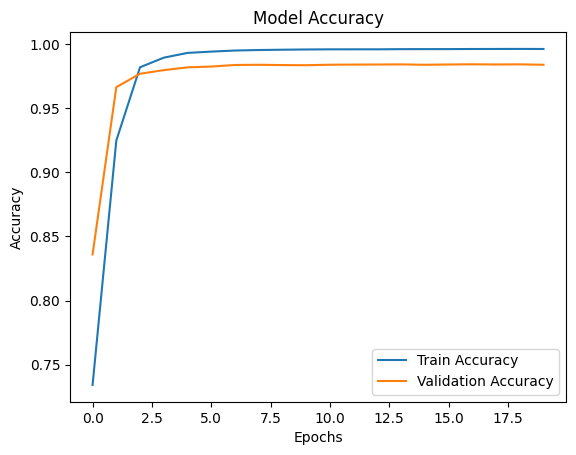

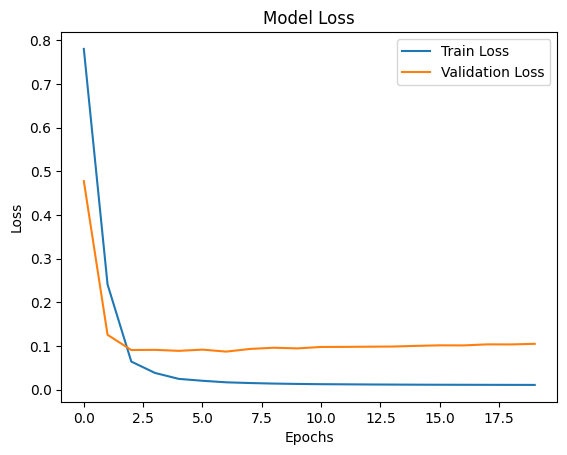

In [6]:
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt



# Evaluate and get classification report

y_pred_probs = model.predict(X_test)

y_pred = np.argmax(y_pred_probs, axis=1)

y_true = np.argmax(y_test, axis=1)

class_names = label_encoder.classes_

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)

print("Classification Report:")

print(report)



# Visualize Training History

plt.plot(history.history['accuracy'], label='Train Accuracy')

plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()



plt.plot(history.history['loss'], label='Train Loss')

plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

# **GRU-Based Text Classification with Category Mapping and Prediction**



### This script demonstrates how to load a pre-trained GRU-based model with an attention layer, preprocess new input texts, predict their subcategories, and map them to high-level categories.

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import load_model

from tensorflow.keras.layers import Layer

from sklearn.preprocessing import LabelEncoder

import numpy as np

import tensorflow as tf



# Define the AttentionLayer if it is not already defined

class AttentionLayer(Layer):

    def __init__(self, **kwargs):

        super(AttentionLayer, self).__init__(**kwargs)



    def build(self, input_shape):

        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)

        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)

        super(AttentionLayer, self).build(input_shape)



    def call(self, inputs):

        q = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)

        a = tf.nn.softmax(q, axis=1)

        output = inputs * a

        return tf.reduce_sum(output, axis=1)



# Load the trained model (if not already in memory)

model = load_model("/kaggle/working/gru_attention_model.h5", custom_objects={'AttentionLayer': AttentionLayer})



# Recreate the LabelEncoder and fit it on your training data subcategories

label_encoder = LabelEncoder()

label_encoder.fit(data['sub_category'])  # Replace with your actual data



# Recreate the Tokenizer and fit it on your training data

tokenizer = Tokenizer(num_words=10000)

tokenizer.fit_on_texts(data['crimeaditionalinfo'])  # Replace with your actual data

MAX_SEQUENCE_LENGTH = 100



# Define the mapping from subcategory to category

subcategory_to_category = {

  'Any Other Cyber Crime': 'Other Cyber Crime',

  'Cheating by Impersonation': 'Other Cyber Crime',

  'Cyber Bullying/Stalking/Sexting': 'Other Cyber Crime',

  'Cyber Terrorism': 'Other Cyber Crime',

  'Damage to Computer Systems': 'Other Cyber Crime',

  'Data Breaches': 'Other Cyber Crime',

  'Defacement of Websites or Unauthorized Changes': 'Other Cyber Crime',

  'Defacement/Hacking': 'Other Cyber Crime',

  'Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks': 'Other Cyber Crime',

  'Email Hacking': 'Other Cyber Crime',

  'Email Phishing': 'Other Cyber Crime',

  'Fake/Impersonating Profile': 'Other Cyber Crime',

  'Impersonating Email': 'Other Cyber Crime',

  'Intimidating Email': 'Other Cyber Crime',

  'Defacement/Hacking': 'Other Cyber Crime',

  'Online Matrimonial Fraud': 'Other Cyber Crime',

  'Email Hacking': 'Other Cyber Crime',

  'Intimidating Email': 'Other Cyber Crime',

  'Malicious code attacks (e.g., virus, worm, Trojan, Bots, Spyware, Ransomware, Crypto miners)': 'Other Cyber Crime',

  'Online Cyber Trafficking': 'Other Cyber Crime',

  'Online Job Fraud': 'Other Cyber Crime',

  'Online Matrimonial Fraud': 'Other Cyber Crime',

  'Profile Hacking/Identity Theft': 'Other Cyber Crime',

  'Provocative Speech of Unlawful Acts':'Other Cyber Crime',

  'Ransomware':'Other Cyber Crime',

  'SQL Injection':'Other Cyber Crime',

  'Tampering with Computer Source Documents':'Other Cyber Crime',

  'Unauthorized Access/Data Breach':'Other Cyber Crime',



    

  'UPI-Related Frauds': 'Financial Fraud Crimes',

  'Internet Banking-Related Fraud': 'Financial Fraud Crimes',

  'E-Wallet Related Frauds': 'Financial Fraud Crimes',

  'Debit/Credit Card Fraud or SIM Swap Fraud': 'Financial Fraud Crimes',

  'Fraud Call/Vishing': 'Financial Fraud Crimes',

  'Cryptocurrency Crime': 'Financial Fraud Crimes',

  'Demat/Depository Fraud': 'Financial Fraud Crimes',

  'Online Gambling/Betting Fraud': 'Financial Fraud Crimes',

  'Business Email Compromise/Email Takeover': 'Financial Fraud Crimes',



    

  'Rape/Gang Rape-Sexually Abusive Content': 'Women/Child Related Crime',

  'Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material': 'Women/Child Related Crime',

  'Child Pornography/Child Sexual Abuse Material (CSAM)': 'Women/Child Related Crime'

}



# Sample new texts for prediction

new_texts = [

    " rohit is a sometimes looking like thief and staring countinously me and he attack"

    

]



# Preprocess the new texts

new_sequences = tokenizer.texts_to_sequences(new_texts)  # Convert to sequences

new_padded_sequences = pad_sequences(new_sequences, maxlen=MAX_SEQUENCE_LENGTH)  # Pad sequences



# Predict probabilities

pred_probs = model.predict(new_padded_sequences)

predicted_classes = np.argmax(pred_probs, axis=1)  # Get the predicted class indices



# Decode predictions to subcategory labels

predicted_subcategory_labels = label_encoder.inverse_transform(predicted_classes)



# Map subcategory to category

predicted_category_labels = [subcategory_to_category.get(subcat, "Unknown Category") for subcat in predicted_subcategory_labels]



# Display results

for text, category, subcategory in zip(new_texts, predicted_category_labels, predicted_subcategory_labels):

    print(f"Text: {text}")

    print(f"Predicted Category: {category}")

    print(f"Predicted Subcategory: {subcategory}")

    print("-" * 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Text:  rohit is a sometimes looking like thief and staring countinously me and he attack
Predicted Category: Other Cyber Crime
Predicted Subcategory: Provocative Speech of Unlawful Acts
--------------------------------------------------


# **Batch Prediction for Cyber Crime Classification**



### This script processes an input CSV file containing text descriptions, predicts their subcategories and high-level categories using a pre-trained GRU model with an attention layer, and outputs the results to a new CSV file.

In [13]:
import pandas as pd

import numpy as np

import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import load_model

from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.text import Tokenizer



# Define the AttentionLayer if it is not already defined

class AttentionLayer(tf.keras.layers.Layer):

    def _init_(self, **kwargs):

        super(AttentionLayer, self)._init_(**kwargs)



    def build(self, input_shape):

        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], input_shape[-1]), initializer="glorot_uniform", trainable=True)

        self.b = self.add_weight(name="att_bias", shape=(input_shape[-1],), initializer="zeros", trainable=True)

        super(AttentionLayer, self).build(input_shape)



    def call(self, inputs):

        q = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)

        a = tf.nn.softmax(q, axis=1)

        output = inputs * a

        return tf.reduce_sum(output, axis=1)



# Load the trained model (if not already in memory)

model = load_model("/kaggle/input/gdgdfgdgg/gru_attention_model.h5", custom_objects={'AttentionLayer': AttentionLayer})



# Recreate the LabelEncoder and fit it on your training data subcategories

label_encoder = LabelEncoder()

label_encoder.fit(data['sub_category'])  # Replace with your actual data



# Recreate the Tokenizer and fit it on your training data

tokenizer = Tokenizer(num_words=10000)

tokenizer.fit_on_texts(data['crimeaditionalinfo'])  # Replace with your actual data

MAX_SEQUENCE_LENGTH = 100



# Define the mapping from subcategory to category

subcategory_to_category = {

    'Any Other Cyber Crime': 'Other Cyber Crime',

    'Cheating by Impersonation': 'Other Cyber Crime',

    'Cyber Bullying/Stalking/Sexting': 'Other Cyber Crime',

    'Cyber Terrorism': 'Other Cyber Crime',

    'Damage to Computer Systems': 'Other Cyber Crime',

    'Data Breaches': 'Other Cyber Crime',

    'Defacement of Websites or Unauthorized Changes': 'Other Cyber Crime',

    'Defacement/Hacking': 'Other Cyber Crime',

    'Denial of Service (DoS) and Distributed Denial of Service (DDoS) attacks': 'Other Cyber Crime',

    'Email Hacking': 'Other Cyber Crime',

    'Email Phishing': 'Other Cyber Crime',

    'Fake/Impersonating Profile': 'Other Cyber Crime',

    'Impersonating Email': 'Other Cyber Crime',

    'Intimidating Email': 'Other Cyber Crime',

    'Defacement/Hacking': 'Other Cyber Crime',

    'Online Matrimonial Fraud': 'Other Cyber Crime',

    'Email Hacking': 'Other Cyber Crime',

    'Intimidating Email': 'Other Cyber Crime',

    'Malicious code attacks (e.g., virus, worm, Trojan, Bots, Spyware, Ransomware, Crypto miners)': 'Other Cyber Crime',

    'Online Cyber Trafficking': 'Other Cyber Crime',

    'Online Job Fraud': 'Other Cyber Crime',

    'Online Matrimonial Fraud': 'Other Cyber Crime',

    'Profile Hacking/Identity Theft': 'Other Cyber Crime',

    'Provocative Speech of Unlawful Acts': 'Other Cyber Crime',

    'Ransomware': 'Other Cyber Crime',

    'SQL Injection': 'Other Cyber Crime',

    'Tampering with Computer Source Documents': 'Other Cyber Crime',

    'Unauthorized Access/Data Breach': 'Other Cyber Crime',

    

    'UPI-Related Frauds': 'Financial Fraud Crimes',

    'Internet Banking-Related Fraud': 'Financial Fraud Crimes',

    'E-Wallet Related Frauds': 'Financial Fraud Crimes',

    'Debit/Credit Card Fraud or SIM Swap Fraud': 'Financial Fraud Crimes',

    'Fraud Call/Vishing': 'Financial Fraud Crimes',

    'Cryptocurrency Crime': 'Financial Fraud Crimes',

    'Demat/Depository Fraud': 'Financial Fraud Crimes',

    'Online Gambling/Betting Fraud': 'Financial Fraud Crimes',

    'Business Email Compromise/Email Takeover': 'Financial Fraud Crimes',

    

    'Rape/Gang Rape-Sexually Abusive Content': 'Women/Child Related Crime',

    'Sale, Publishing and Transmitting Obscene Material/Sexually Explicit Material': 'Women/Child Related Crime',

    'Child Pornography/Child Sexual Abuse Material (CSAM)': 'Women/Child Related Crime'

}



# Function to predict subcategory and category for new text

def predict_category_and_subcategory(texts, tokenizer, model, label_encoder, subcategory_to_category):

    # Preprocess the new texts

    new_sequences = tokenizer.texts_to_sequences(texts)

    new_padded_sequences = pad_sequences(new_sequences, maxlen=MAX_SEQUENCE_LENGTH)



    # Predict probabilities

    pred_probs = model.predict(new_padded_sequences, batch_size=64)  # Adjust batch_size as needed

    predicted_classes = np.argmax(pred_probs, axis=1)  # Get the predicted class indices



    # Decode predictions to subcategory labels

    predicted_subcategories = label_encoder.inverse_transform(predicted_classes)



    # Map subcategories to categories

    predicted_categories = [subcategory_to_category.get(subcat, "Unknown Category") for subcat in predicted_subcategories]

    

    return predicted_categories, predicted_subcategories



# Read the input CSV file containing text descriptions

input_file = "input_data.csv"  # Replace with the actual file path

df = pd.read_csv('/kaggle/input/matajai/pro2_test.csv')

df = df.dropna(subset=['crimeaditionalinfo'])



# Assuming the column containing text descriptions is named 'description'

new_texts = df['crimeaditionalinfo'].tolist()



# Predict categories and subcategories in batches

predicted_categories, predicted_subcategories = predict_category_and_subcategory(new_texts, tokenizer, model, label_encoder, subcategory_to_category)



# Add the predictions to the DataFrame

df['Predicted Category'] = predicted_categories

df['Predicted Subcategory'] = predicted_subcategories



# Save the results to a new CSV file

output_file = "predicted_output1.csv"  # Replace with desired output file name

df.to_csv(output_file, index=False)



print(f"Predictions saved to {output_file}")

450/450 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step
Predictions saved to predicted_output1.csv


In [15]:
df.head(15)

,Unnamed: 0,category,sub_category,crimeaditionalinfo,Predicted Category,Predicted Subcategory
0,0,Women/Child Related Crime,Rape/Gang Rape-Sexually Abusive Content,sir namaskar mein ranjit kumar patrapaise nehi...,Financial Fraud Crimes,UPI-Related Frauds
1,1,Financial Fraud Crimes,Debit/Credit Card Fraud or SIM Swap Fraud,kotak mahindra bank fraud fraud amount,Financial Fraud Crimes,UPI-Related Frauds
2,2,Other Cyber Crime,SQL Injection,issue actually started got email first glance ...,Other Cyber Crime,"Malicious code attacks (e.g., virus, worm, Tro..."
3,3,Financial Fraud Crimes,Fraud Call/Vishing,amit kumar karwi chitrakoot totally depressed ...,Financial Fraud Crimes,UPI-Related Frauds
4,4,Other Cyber Crime,Any Other Cyber Crime,ordered saree blouse rinki sur paid amount tak...,Financial Fraud Crimes,UPI-Related Frauds
5,5,Financial Fraud Crimes,Internet Banking-Related Fraud,salary amount credited account jan st issue ba...,Financial Fraud Crimes,Debit/Credit Card Fraud or SIM Swap Fraud
6,6,Other Cyber Crime,Unauthorized Access/Data Breach,due financial crisis applied loan loan mobile ...,Other Cyber Crime,Any Other Cyber Crime
7,7,Financial Fraud Crimes,UPI-Related Frauds,person called told gift card purchase mamaeart...,Financial Fraud Crimes,UPI-Related Frauds
8,8,Financial Fraud Crimes,Internet Banking-Related Fraud,namemanik varban nirmal varban addkhara ricco ...,Financial Fraud Crimes,E-Wallet Related Frauds
9,9,Financial Fraud Crimes,Debit/Credit Card Fraud or SIM Swap Fraud,dear sir please stop fraudulent transaction re...,Financial Fraud Crimes,UPI-Related Frauds
